## Partie 1 : Exploration et Preprocessing

### Question 1.1 : Chargement et exploration initiale

- Chargez le dataset et examinez sa structure
- Combien d'observations et de variables ?
- Renommez la colonne cible en 'default' pour simplifier
- Verifiez les valeurs manquantes

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

In [83]:
df.rename(columns={"default payment next month": "default", "PAY_0": "PAY_1"}, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

- 3000 observations
- 25 variables
- Pas de null
- Toutes les varaibles sont numériques et entières

In [85]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- Distributions très inégales entre les variables, nécessité d'utiliser un standard scaler

### Question 1.2 : Analyse de la variable cible

- Quelle est la proportion de defauts de paiement ?
- Le dataset est-il desequilibre ?
- Visualisez la distribution avec un diagramme en barres

Proportion de default : 22.12%


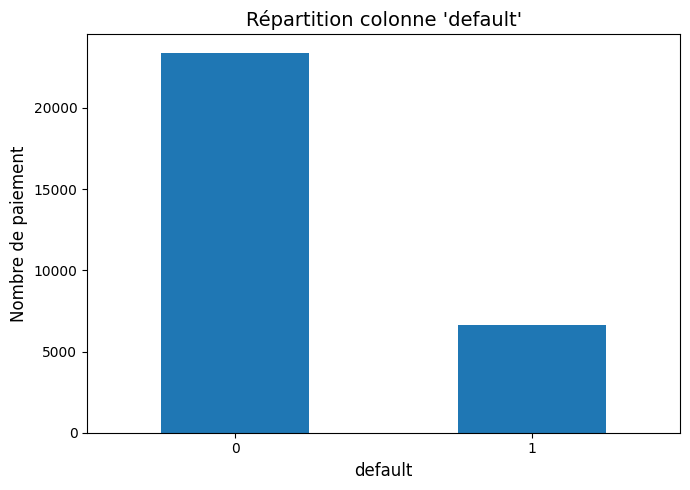

In [86]:
import matplotlib.pyplot as plt

print(f"Proportion de default : {df["default"].sum() / df["default"].count() * 100:.2f}%")

plt.figure(figsize=(7,5))
df["default"].value_counts().sort_index().plot(kind="bar", rot=0)
plt.title("Répartition colonne 'default'", fontsize=14)
plt.xlabel("default", fontsize=12)
plt.ylabel("Nombre de paiement", fontsize=12)
plt.tight_layout()

- Le dataset est déséquilibré

### Question 1.3 : Analyse des variables categorielles

Pour les variables SEX, EDUCATION et MARRIAGE :

- Affichez la distribution de chaque categorie
- Calculez le taux de defaut par categorie
- Y a-t-il des categories avec des valeurs inattendues ?

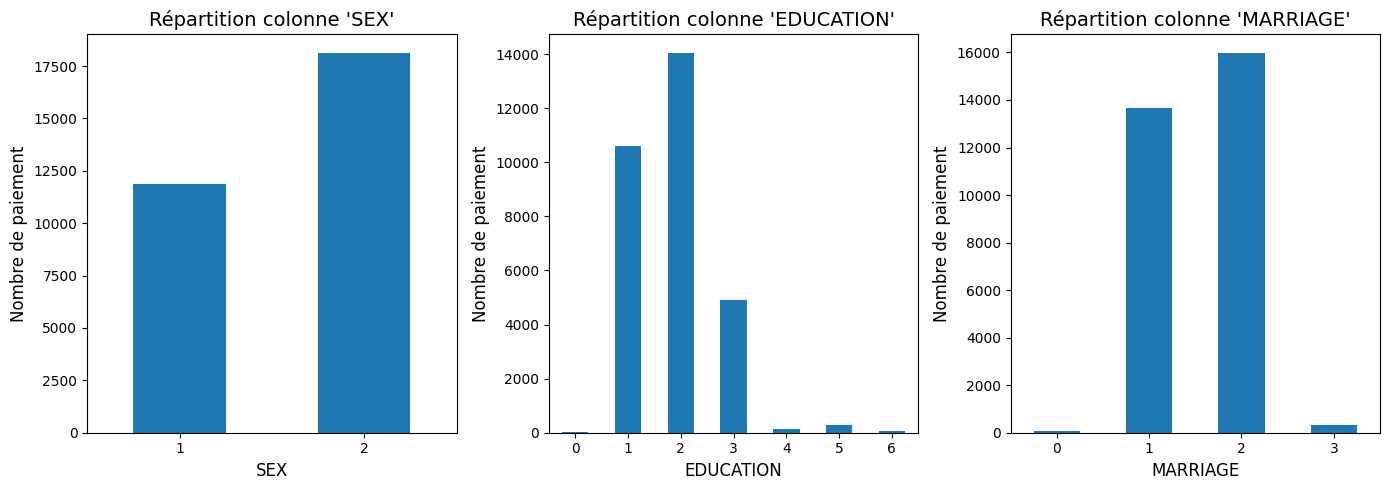

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(14,5))

ax1 = axes[0]
df["SEX"].value_counts().sort_index().plot(kind="bar", rot=0, ax=ax1)
ax1.set_title("Répartition colonne 'SEX'", fontsize=14)
ax1.set_xlabel("SEX", fontsize=12)
ax1.set_ylabel("Nombre de paiement", fontsize=12)

ax2 = axes[1]
df["EDUCATION"].value_counts().sort_index().plot(kind="bar", rot=0, ax=ax2)
ax2.set_title("Répartition colonne 'EDUCATION'", fontsize=14)
ax2.set_xlabel("EDUCATION", fontsize=12)
ax2.set_ylabel("Nombre de paiement", fontsize=12)

ax3 = axes[2]
df["MARRIAGE"].value_counts().sort_index().plot(kind="bar", rot=0, ax=ax3)
ax3.set_title("Répartition colonne 'MARRIAGE'", fontsize=14)
ax3.set_xlabel("MARRIAGE", fontsize=12)
ax3.set_ylabel("Nombre de paiement", fontsize=12)

plt.tight_layout()

In [88]:
categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"]

for col in categorical_columns:
    print(f"Taux de default par {col} :")
    taux_default_per_sex = df.groupby(col)["default"].mean() * 100
    for sex, taux in zip(taux_default_per_sex.index, taux_default_per_sex.values):
        print(f"  {col} : {sex} - Taux : {taux}")
    print()

Taux de default par SEX :
  SEX : 1 - Taux : 24.16722745625841
  SEX : 2 - Taux : 20.776280918727917

Taux de default par EDUCATION :
  EDUCATION : 0 - Taux : 0.0
  EDUCATION : 1 - Taux : 19.23476617855456
  EDUCATION : 2 - Taux : 23.734853884533145
  EDUCATION : 3 - Taux : 25.15761643278422
  EDUCATION : 4 - Taux : 5.691056910569105
  EDUCATION : 5 - Taux : 6.428571428571428
  EDUCATION : 6 - Taux : 15.686274509803921

Taux de default par MARRIAGE :
  MARRIAGE : 0 - Taux : 9.25925925925926
  MARRIAGE : 1 - Taux : 23.471703638626547
  MARRIAGE : 2 - Taux : 20.928338762214985
  MARRIAGE : 3 - Taux : 26.006191950464398



Valeurs inattendues :
- EDUCATION : 0, 5 et 6
- MARRIAGE : 0

In [89]:
df_clean = df.loc[df["EDUCATION"].isin([1, 2, 3, 4]) & df["MARRIAGE"].isin([1, 2, 3])]

print("Nombre de lignes dans le dataset original : ", len(df))
print("Nombre de lignes après suppression des valeurs inattendues : ", len(df_clean))
print("Nombre de lignes supprimées : ", len(df) - len(df_clean))

Nombre de lignes dans le dataset original :  30000
Nombre de lignes après suppression des valeurs inattendues :  29601
Nombre de lignes supprimées :  399


### Question 1.4 : Analyse des variables numeriques

- Creez des boxplots pour LIMIT_BAL et AGE par classe de defaut
- Y a-t-il des differences notables entre les deux groupes ?
- Identifiez les outliers potentiels

Text(0, 0.5, 'Age (année)')

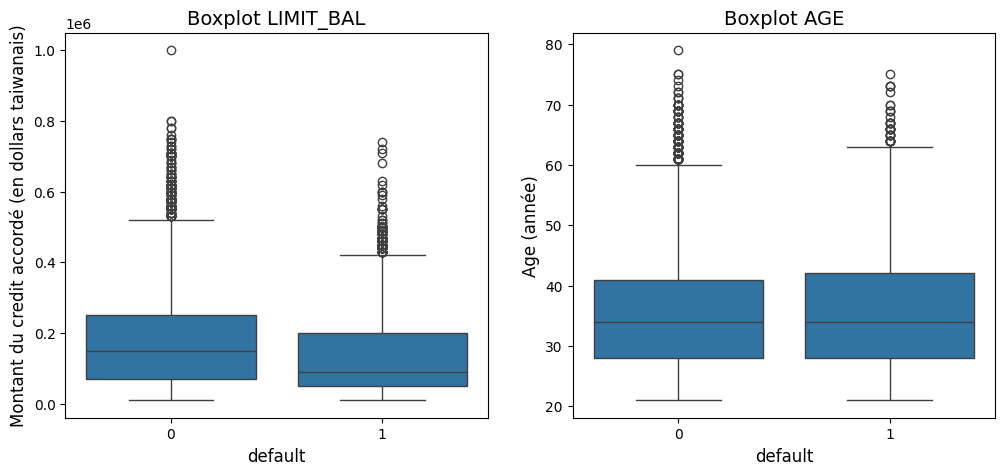

In [90]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))

ax1 = axes[0]
sns.boxplot(df_clean, y="LIMIT_BAL", x="default", ax=ax1)
ax1.set_title("Boxplot LIMIT_BAL", fontsize=14)
ax1.set_xlabel("default", fontsize=12)
ax1.set_ylabel("Montant du credit accordé (en dollars taiwanais)", fontsize=12)

ax2 = axes[1]
sns.boxplot(df_clean, y="AGE", x="default", ax=ax2)
ax2.set_title("Boxplot AGE", fontsize=14)
ax2.set_xlabel("default", fontsize=12)
ax2.set_ylabel("Age (année)", fontsize=12)

- AGE : Pas de différence notable
- LIMIT_BAL : Crédit légérement plus faible pour les défaut de paiement

In [91]:
print("Outler LIMIT_BAL :")
print(df.loc[df["LIMIT_BAL"] >= 900_000])

print("Outler AGE :")
print(df.loc[df["AGE"] >= 78])

Outler LIMIT_BAL :
        ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
2197  2198    1000000    2          1         1   47      0      0      0   

      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2197     -1  ...     891586     927171     961664     50784     50723   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
2197    896040     50000     50000     50256        0  

[1 rows x 25 columns]
Outler AGE :
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
18245  18246     440000    1          1         1   79      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
18245      0  ...     447112     438187     447543     15715     16519   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
18245     16513     15800     16531     15677        0  

[1 rows x 25 columns]


- 1 outler pour LIMIT_BAL (Crédit à 1 million)
- 1 outler pour AGE (79 ans)

In [92]:
df_outlers = df_clean.loc[(df_clean["AGE"] < 78) & (df_clean["MARRIAGE"] < 900_000)]

print("Nombre de lignes dans le dataset original : ", len(df_clean))
print("Nombre de lignes après suppression des valeurs inattendues : ", len(df_outlers))
print("Nombre de lignes supprimées : ", len(df_clean) - len(df_outlers))

Nombre de lignes dans le dataset original :  29601
Nombre de lignes après suppression des valeurs inattendues :  29600
Nombre de lignes supprimées :  1


### Question 1.5 : Feature engineering

Creez les nouvelles features suivantes :

- `utilization_rate` : ratio moyen utilisation credit (BILL_AMT / LIMIT_BAL)
- `payment_ratio` : ratio moyen paiement/facture (PAY_AMT / BILL_AMT)
- `total_delay` : somme des retards de paiement (PAY_0 a PAY_6)

In [93]:
df_features = df_outlers.copy()
df_features["BILL_AMT"] = df_features[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis=1).values
df_features["utilization_rate"] = df_features["BILL_AMT"] / df_features["LIMIT_BAL"]
df_features["PAY_AMT"] = df_features[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].sum(axis=1).values
df_features["payment_ratio"] = df_features["PAY_AMT"] / df_features["BILL_AMT"]
df_features["total_delay"] = df_features[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].sum(axis=1).values

In [95]:
import numpy as np

df_features["utilization_rate"] = df_features["utilization_rate"].replace([np.inf, -np.inf], 0).fillna(0)
df_features["payment_ratio"] = df_features["payment_ratio"].replace([np.inf, -np.inf], 0).fillna(0)

## Partie 2 : Preparation des Donnees

### Question 2.1 : Encodage des variables categorielles

- Appliquez One-Hot Encoding sur EDUCATION et MARRIAGE
- Gardez SEX en binaire (0/1)
- Supprimez les colonnes originales apres encodage

In [100]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="error")
X_encoded = encoder.fit_transform(df_features[["SEX", "EDUCATION", "MARRIAGE"]])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(["SEX", "EDUCATION", "MARRIAGE"]) for cat in encoder.categories_[i]]
one_hot_features = pd.DataFrame(X_encoded.toarray(), columns=categorical_columns, index=df_features.index)
df_encode = df_features.join(one_hot_features).drop(["SEX", "EDUCATION", "MARRIAGE"], axis=1)

### Question 2.2 : Separation et standardisation

- Separez features (X) et cible (y)
- Divisez en train/test (80/20, stratify=y)
- Standardisez les features numeriques

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encode.loc[:, df_encode.columns != "default"]
y = df_encode["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Partie 3 : Entrainement du Modele

### Question 3.1 : Modele de base

Entrainez une regression logistique avec les parametres par defaut

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy train : {accuracy_train:.2%}")

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy test : {accuracy_test:.2%}")

Accuracy train : 80.91%
Accuracy test : 80.96%


In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_test_pred, target_names=["non default", "default"]))

              precision    recall  f1-score   support

 non default       0.82      0.97      0.89      4599
     default       0.72      0.24      0.36      1321

    accuracy                           0.81      5920
   macro avg       0.77      0.61      0.62      5920
weighted avg       0.80      0.81      0.77      5920



<Figure size 1200x700 with 0 Axes>

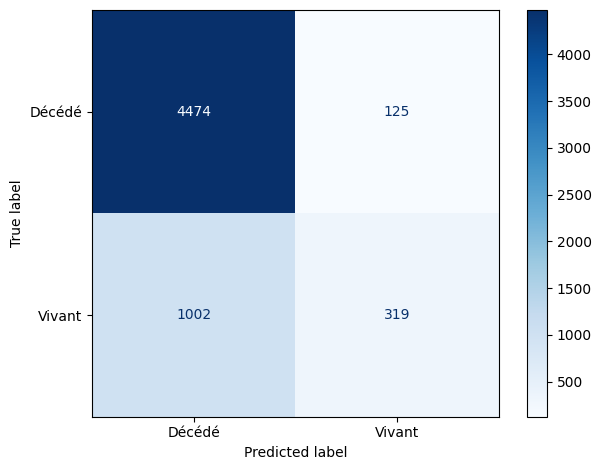

In [106]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,7))
display = ConfusionMatrixDisplay(cm, display_labels=["Décédé", "Vivant"])
display.plot(cmap="Blues")
plt.tight_layout()